# Data gathering

## Imports

In [43]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [44]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [45]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


## Label

In [46]:
label = 'L-10'
y = data[label]

## Plotting function

In [47]:
def cor_scatter(X,y,size):
    cmap = plt.get_cmap('gnuplot')
    scatter = pd.plotting.scatter_matrix(X, 
                                     c = y, 
                                     marker = '.',
                                     s=40, 
                                     hist_kwds={'bins':15}, 
                                     figsize=(size,size), 
                                     cmap = cmap)
    corr = X.corr().values
    for i, j in zip(*plt.np.triu_indices_from(scatter, k=1)):
        scatter[i,j].annotate("%.3f" %corr[i,j], (0.5, 0.9), xycoords='axes fraction', ha='center', va='baseline', size=15, color='r')
        
    for i, j in zip(*plt.np.tril_indices_from(scatter, k=1)):
        vals = scatter[i,j].get_yticks()
        scatter[i,j].set_yticklabels(["{:.2f}".format(x).rstrip('0').rstrip('.') for x in vals])

# Plot correlation matrices

black = rank <= N  
yellow = rank > N  

## Static Metrics

<IPython.core.display.Javascript object>


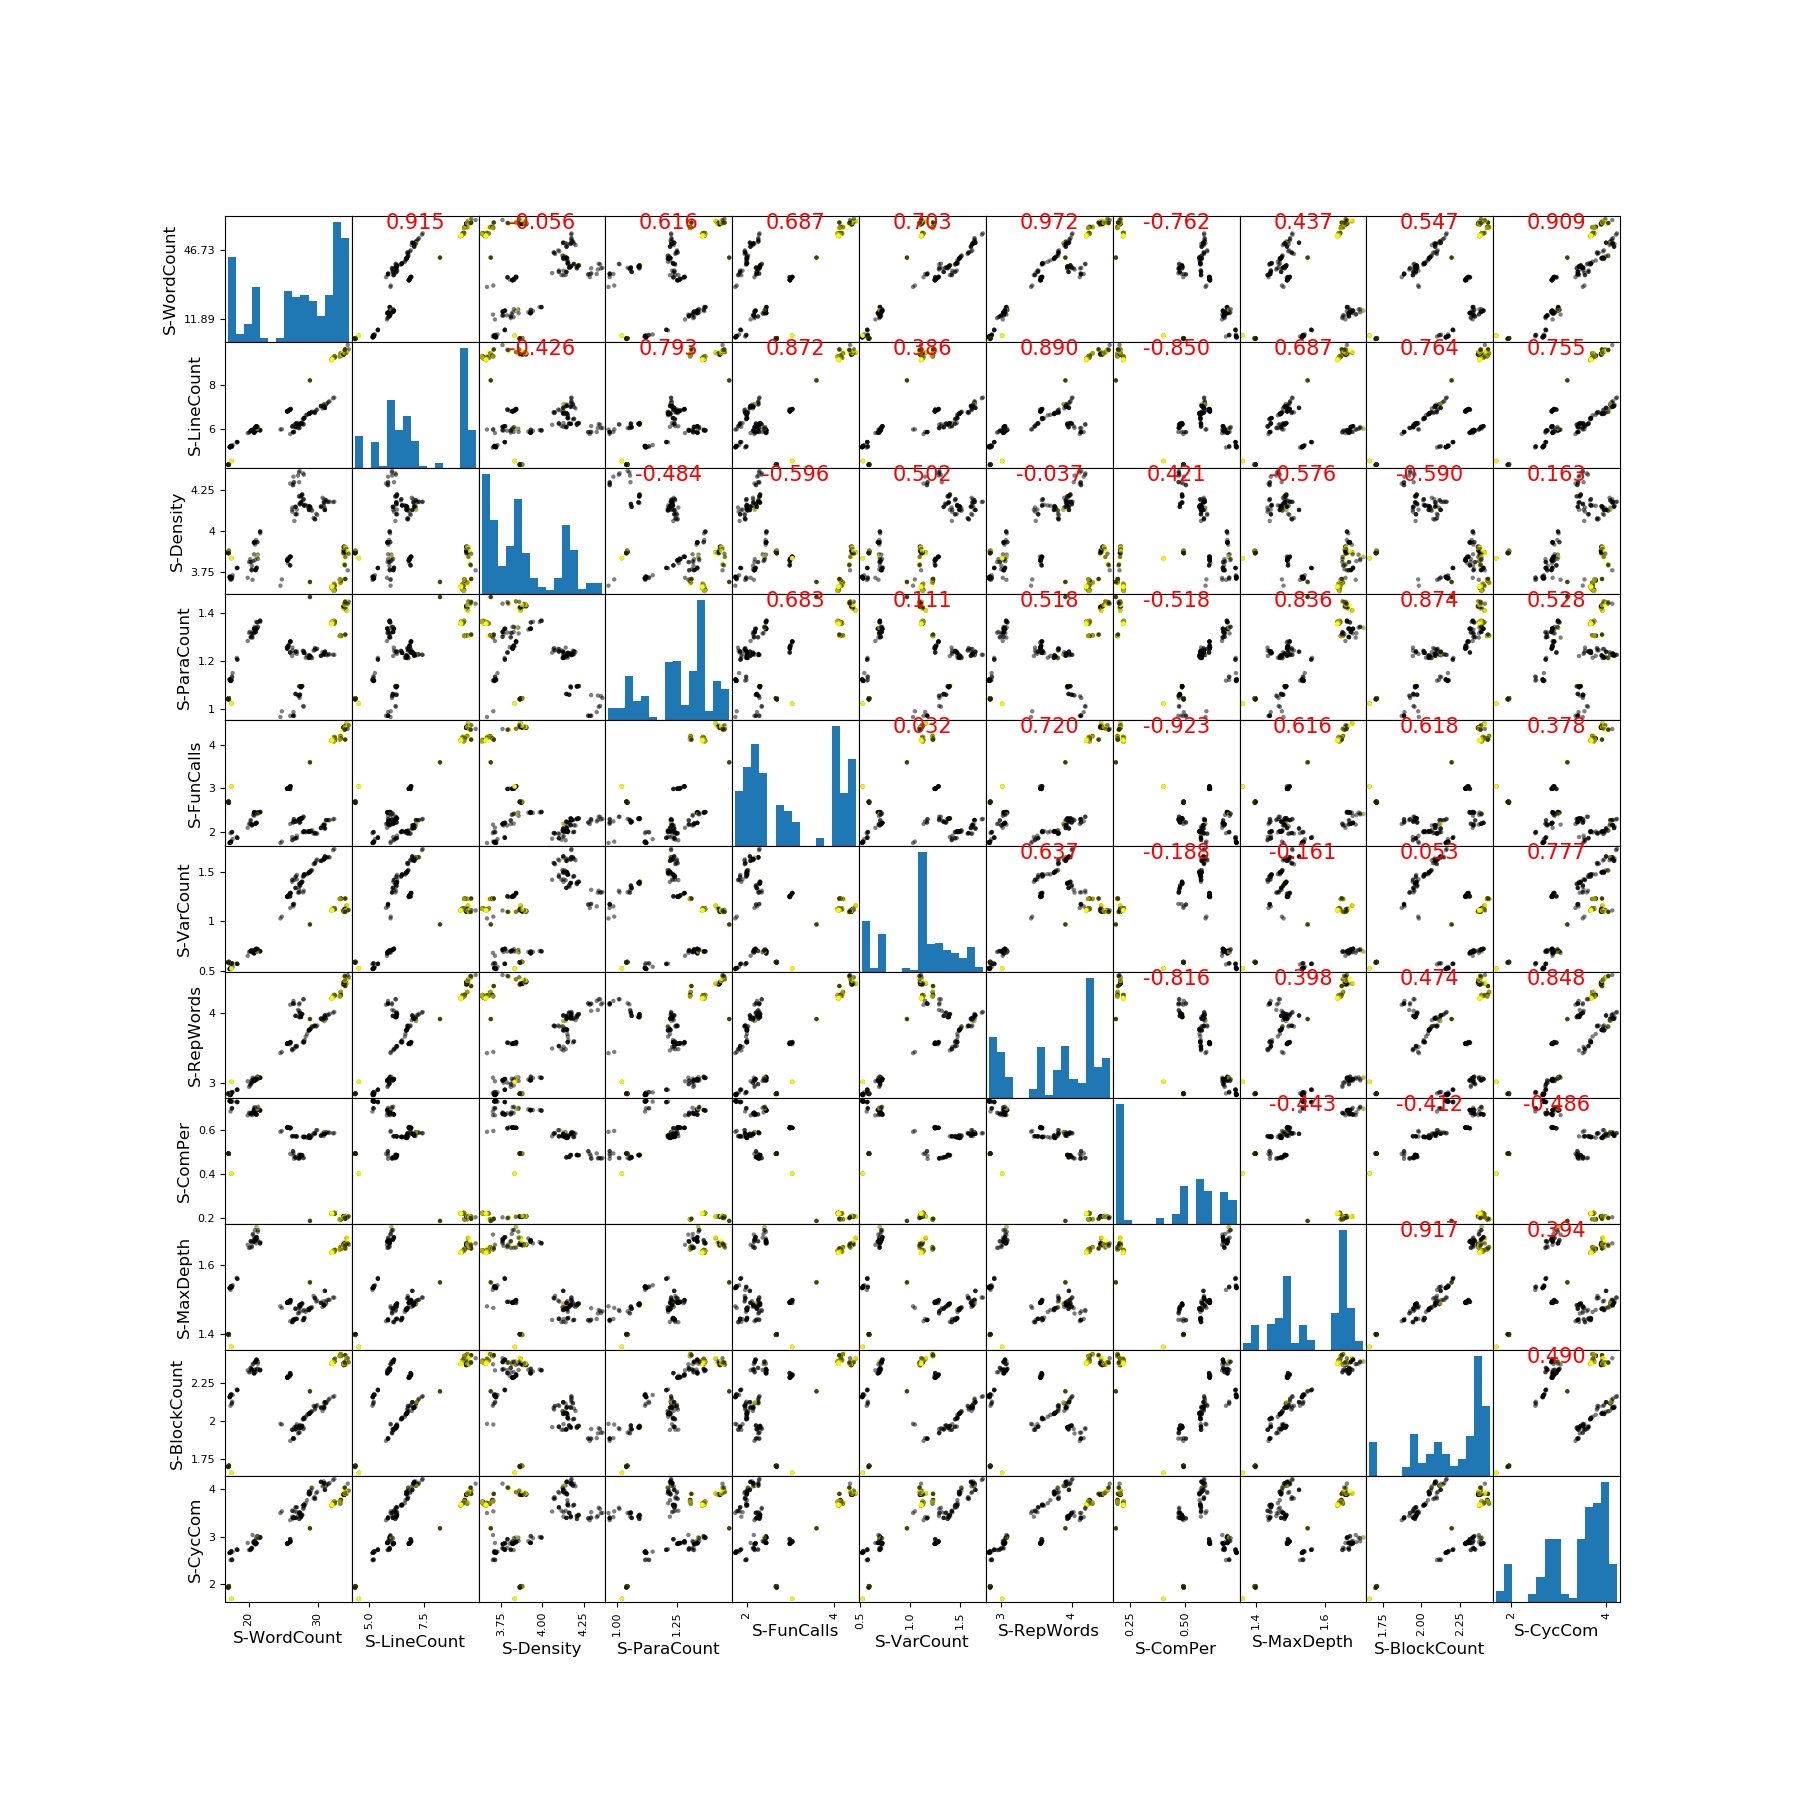

In [48]:
X = data.filter(like='S-')
cor_scatter(X,y,18);

## Dynamic Metrics

<IPython.core.display.Javascript object>


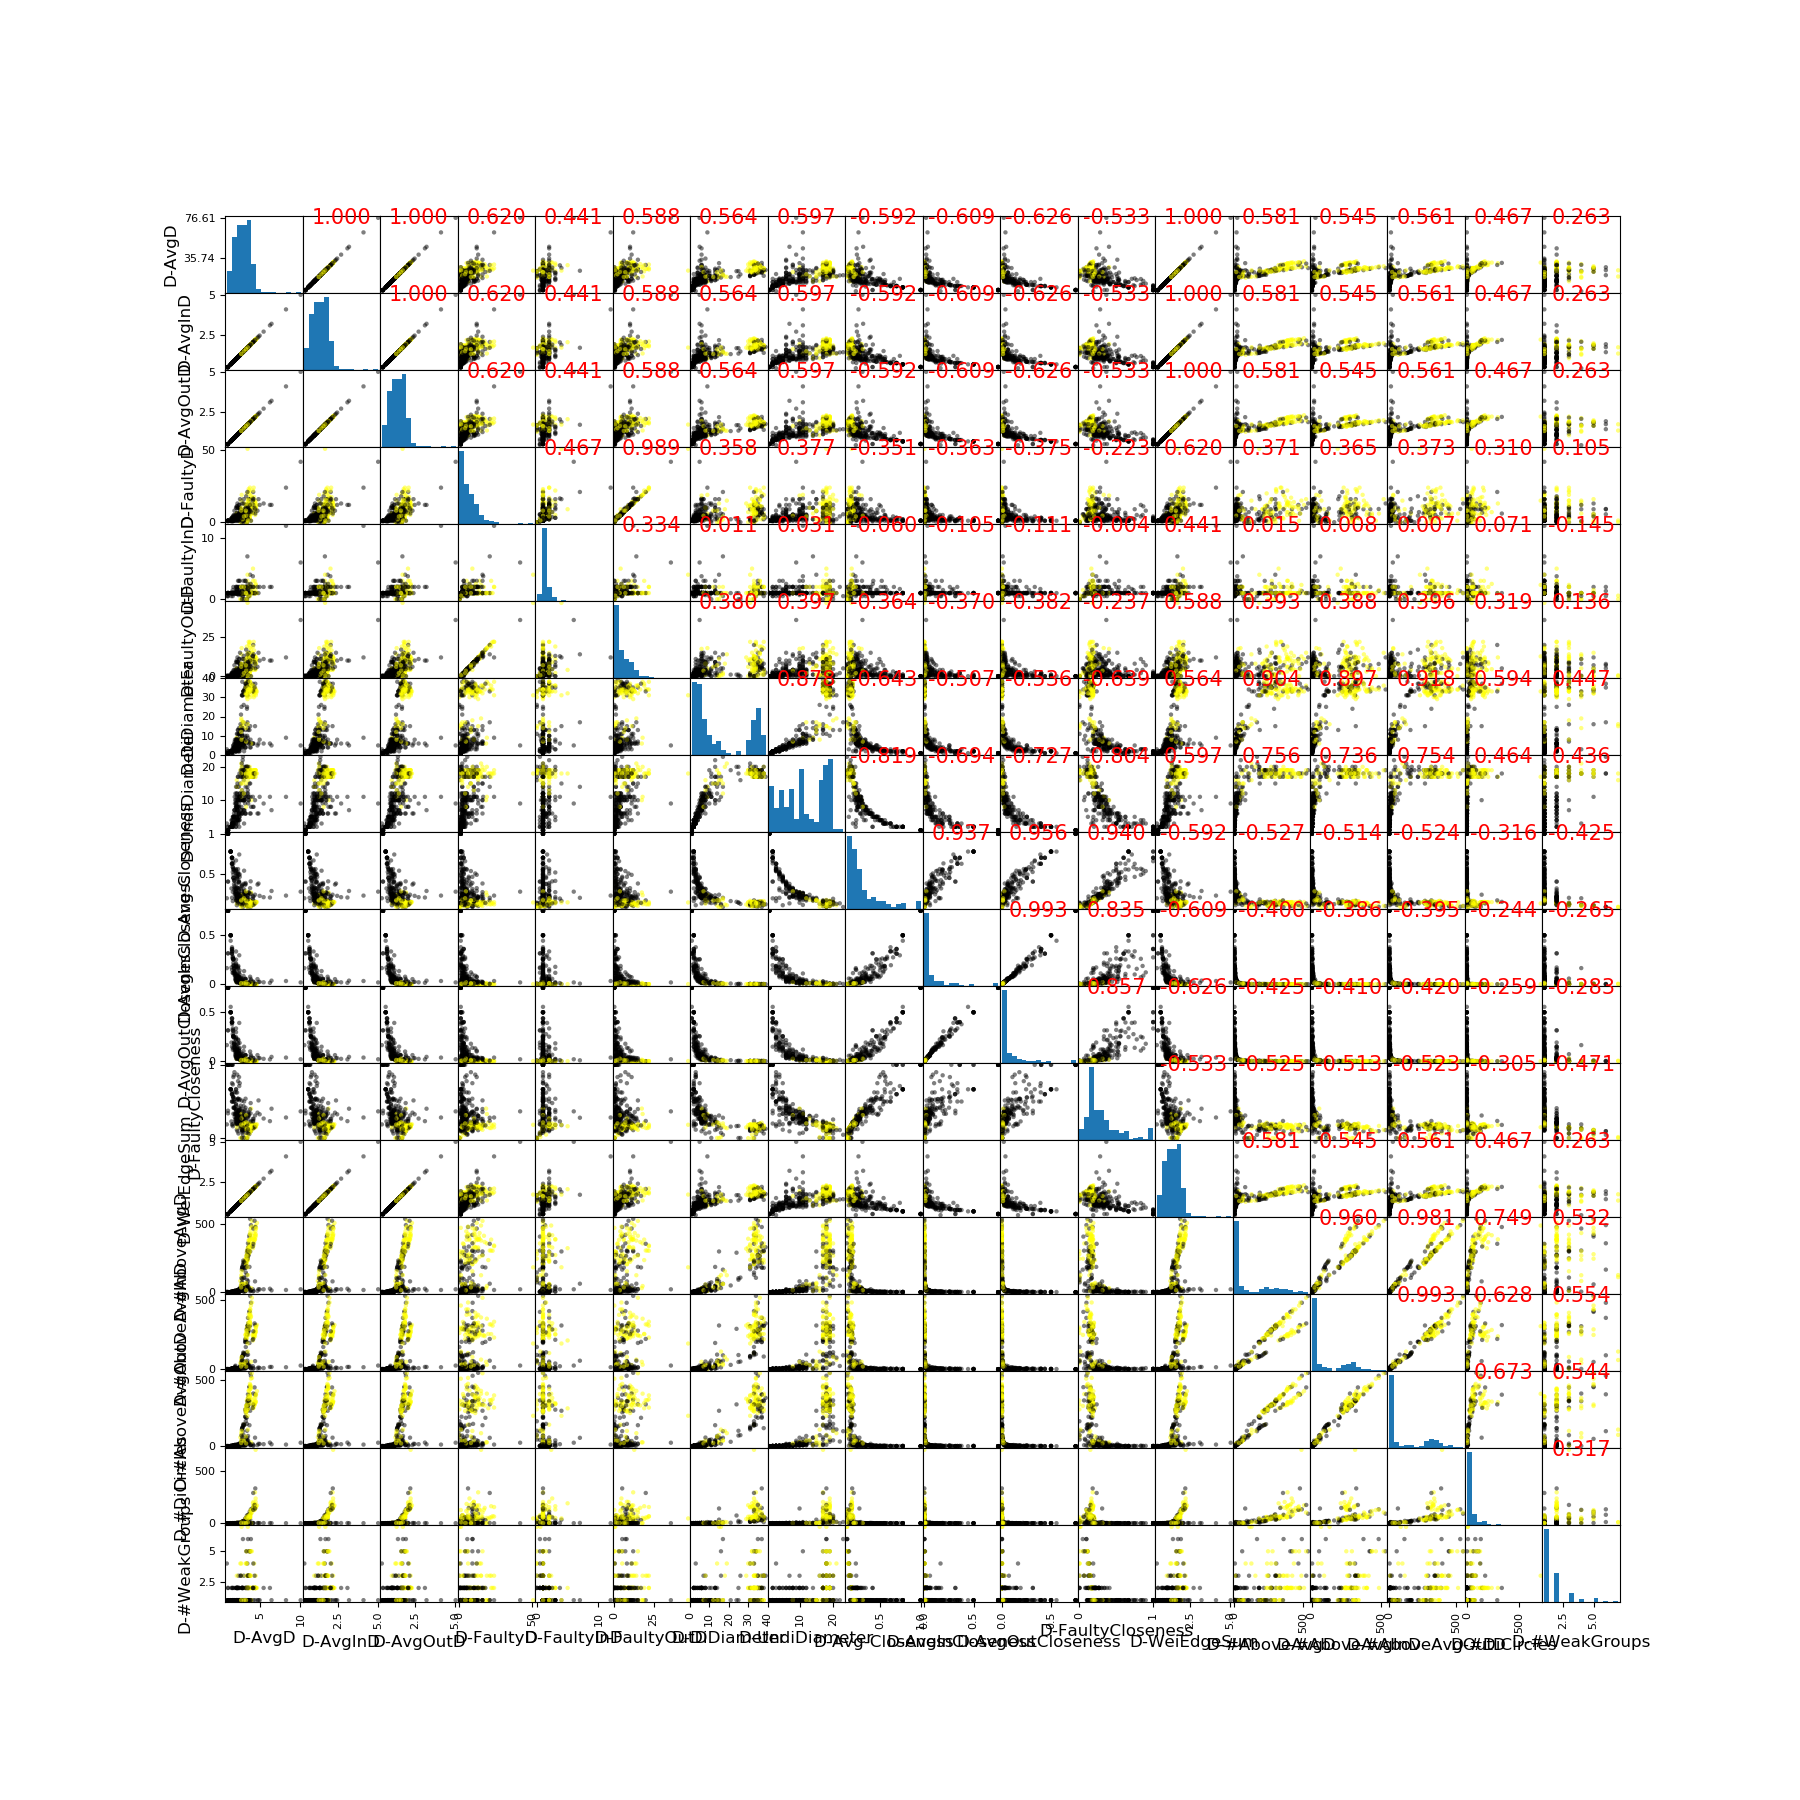

In [49]:
X = data.filter(like='D-')
cor_scatter(X,y,18);

## Test metrics

<IPython.core.display.Javascript object>


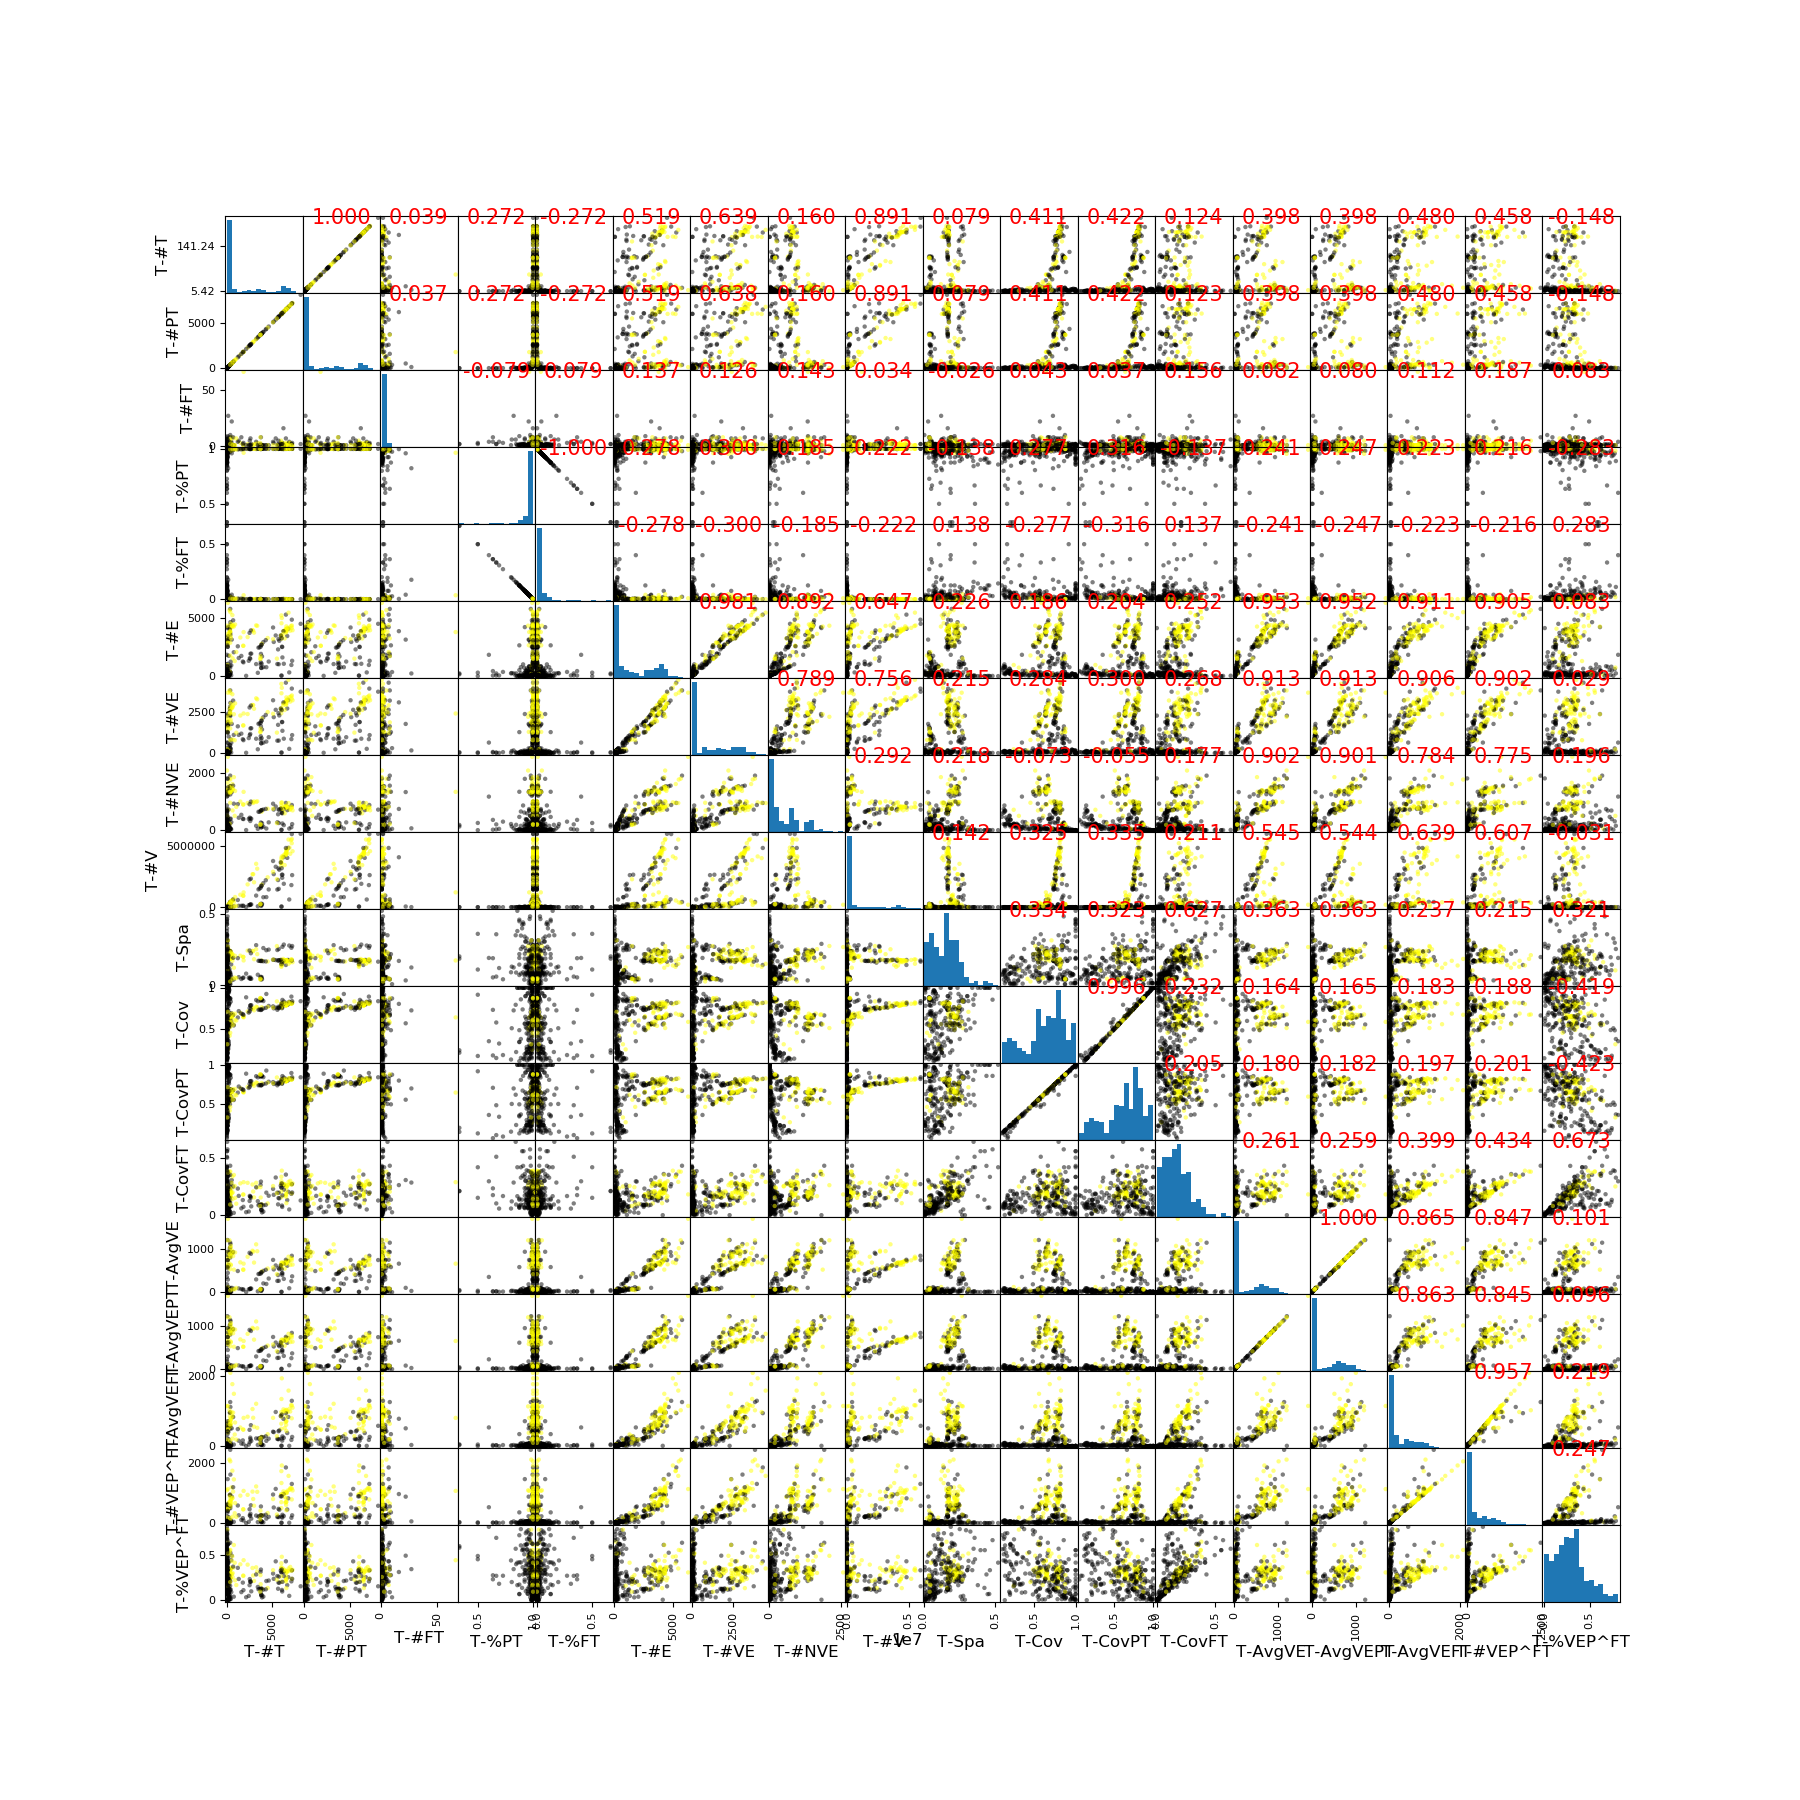

In [17]:
X = data.filter(like='T-')
cor_scatter(X,y,18);

## Bug Metrics

<IPython.core.display.Javascript object>


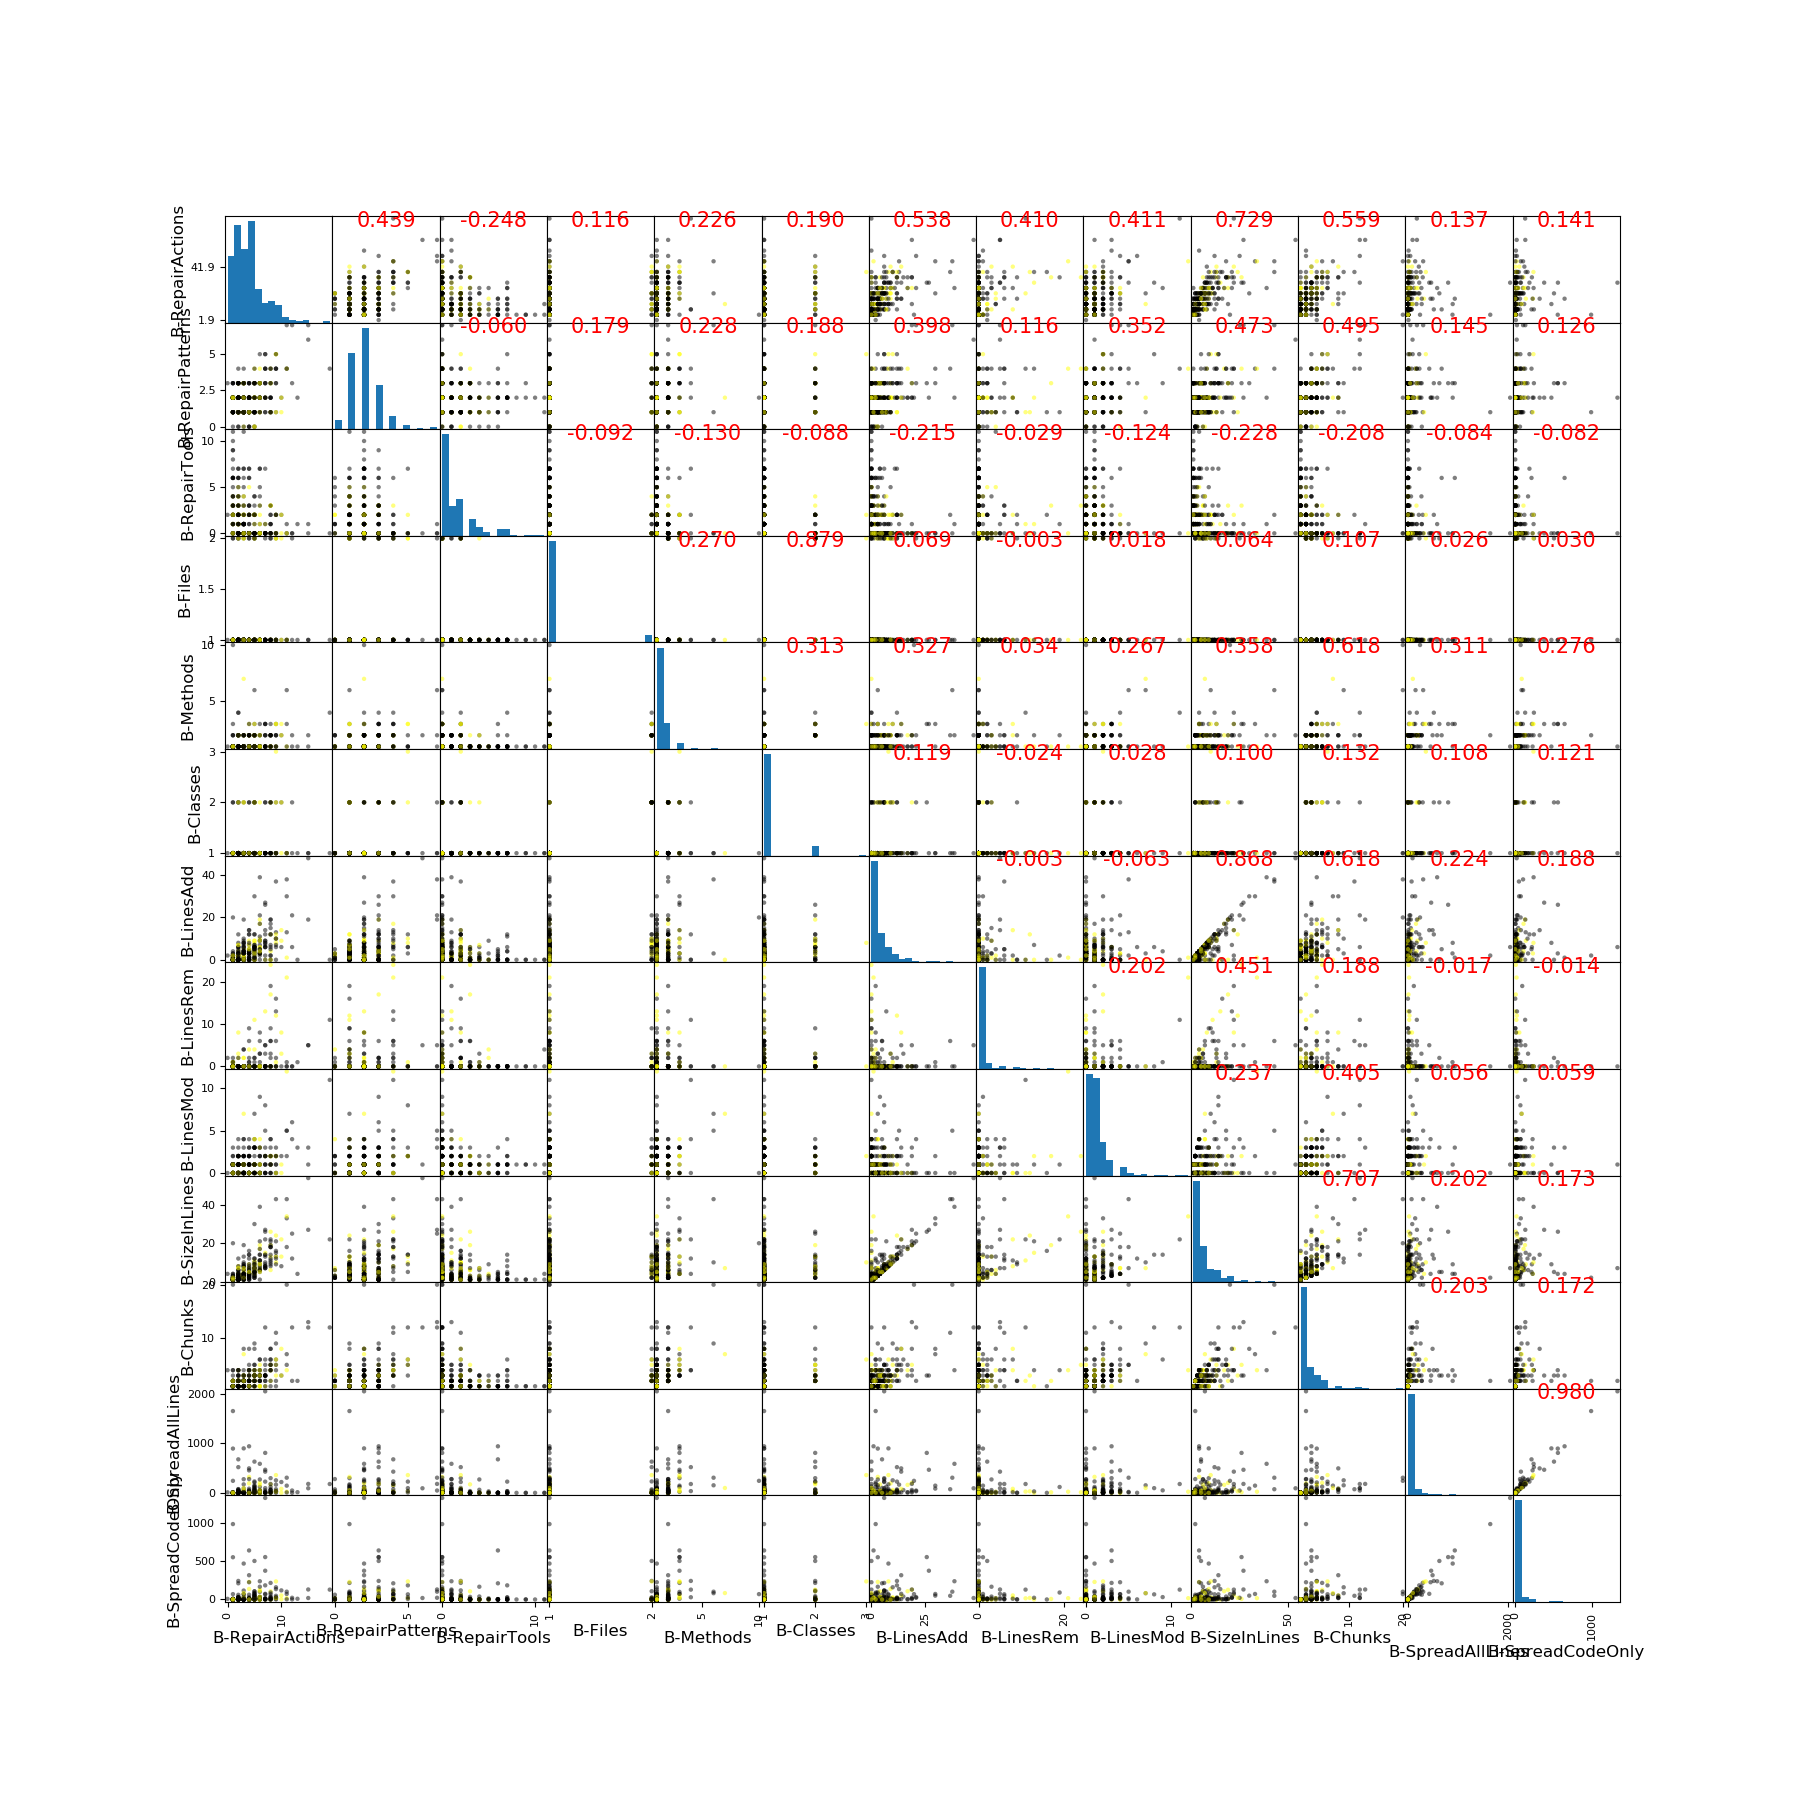

In [18]:
X = data.filter(like='B-')
cor_scatter(X,y,18);

# Correlations

## Static metrics

<IPython.core.display.Javascript object>


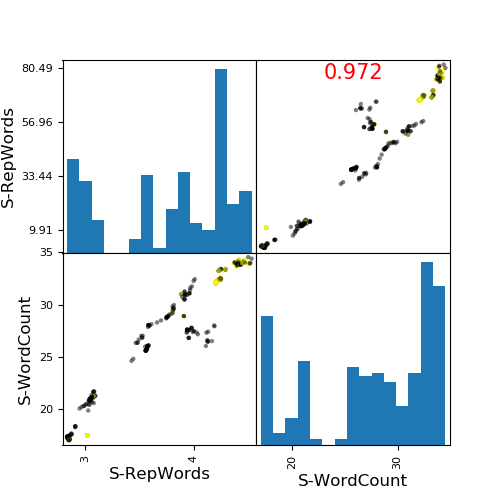

<IPython.core.display.Javascript object>


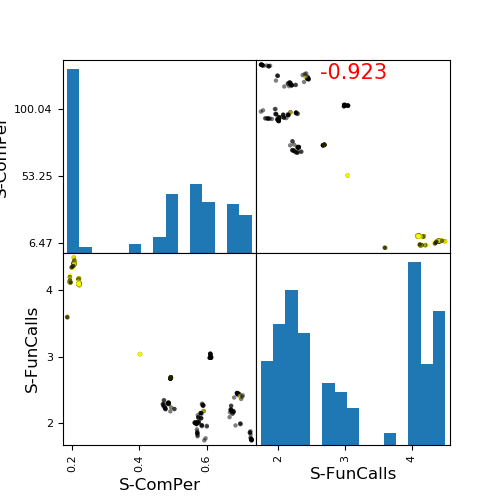

<IPython.core.display.Javascript object>


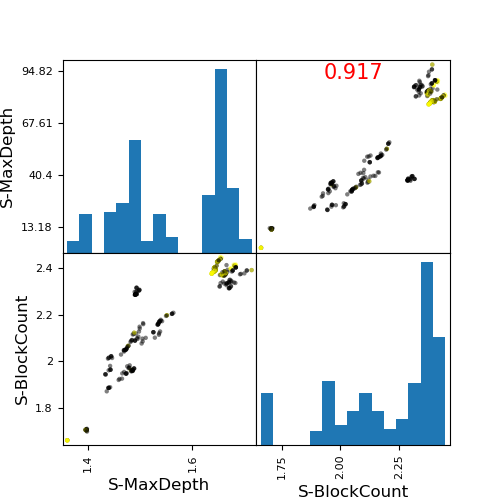

<IPython.core.display.Javascript object>


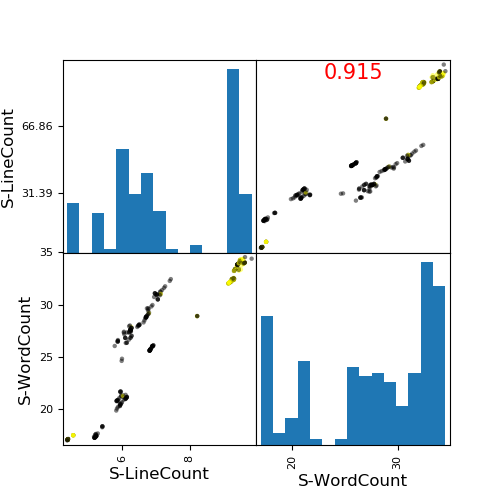

<IPython.core.display.Javascript object>


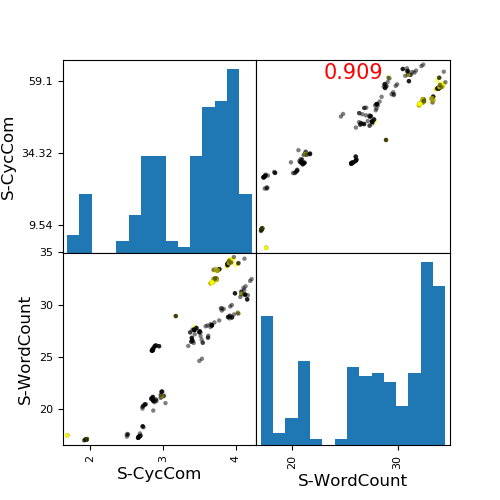

<IPython.core.display.Javascript object>


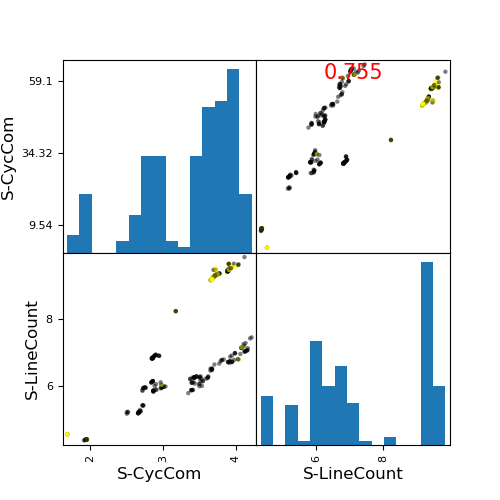

<IPython.core.display.Javascript object>


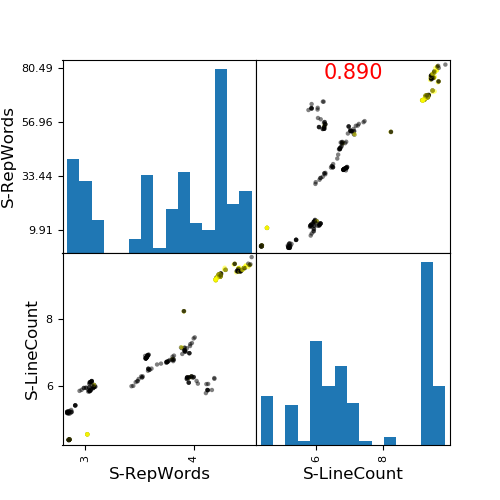

<IPython.core.display.Javascript object>


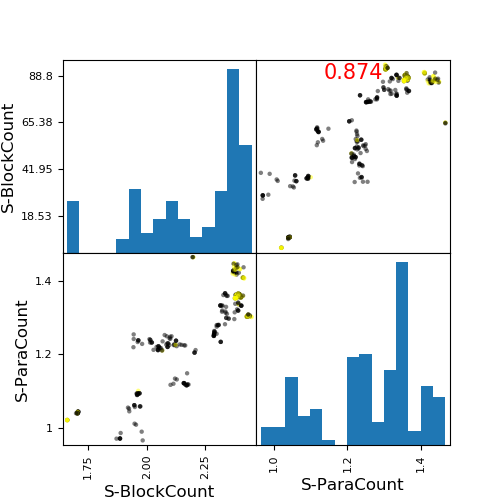

<IPython.core.display.Javascript object>


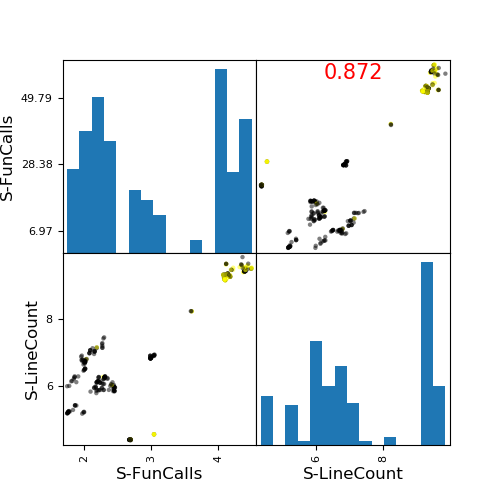

<IPython.core.display.Javascript object>


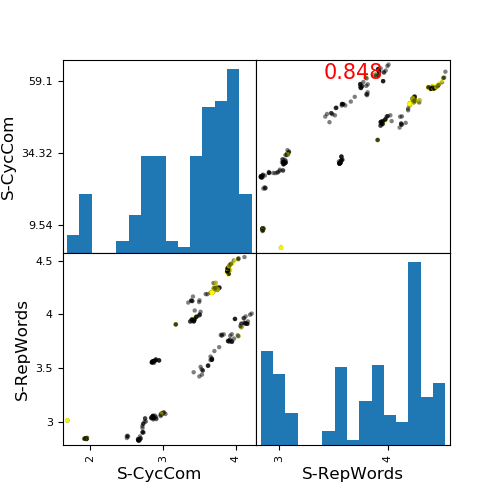

<IPython.core.display.Javascript object>


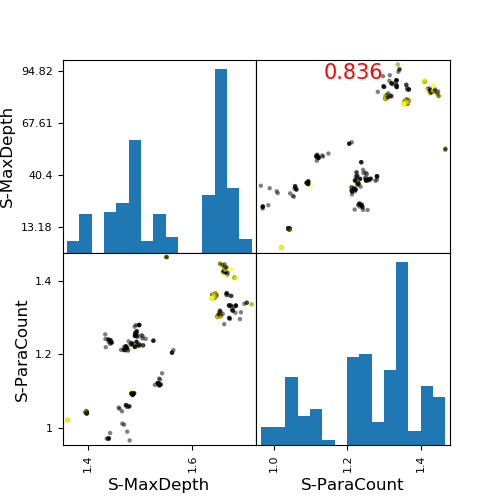

<IPython.core.display.Javascript object>


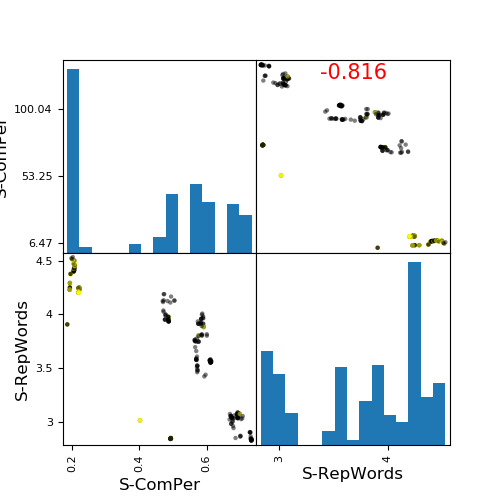

<IPython.core.display.Javascript object>


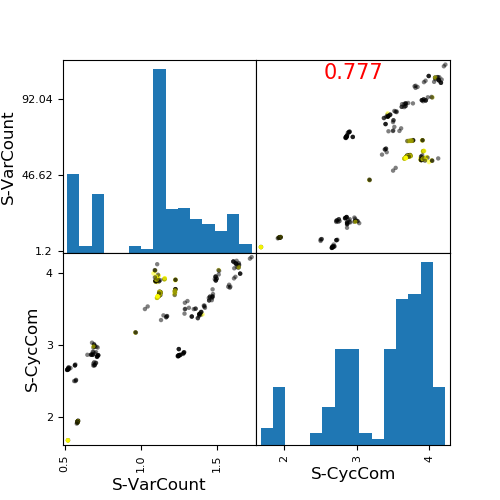

<IPython.core.display.Javascript object>


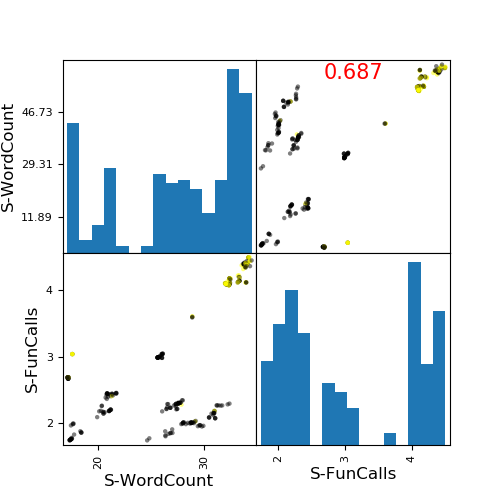

In [42]:
cor_scatter(data[['S-RepWords', 'S-WordCount']],y,5);
cor_scatter(data[['S-ComPer', 'S-FunCalls']],y,5);
cor_scatter(data[['S-MaxDepth', 'S-BlockCount']],y,5);
cor_scatter(data[['S-LineCount', 'S-WordCount']],y,5);
cor_scatter(data[['S-CycCom', 'S-WordCount']],y,5);
cor_scatter(data[['S-CycCom', 'S-LineCount']],y,5);
cor_scatter(data[['S-RepWords', 'S-LineCount']],y,5);
cor_scatter(data[['S-BlockCount', 'S-ParaCount']],y,5);
cor_scatter(data[['S-FunCalls', 'S-LineCount']],y,5);
cor_scatter(data[['S-CycCom', 'S-RepWords']],y,5);
cor_scatter(data[['S-MaxDepth', 'S-ParaCount']],y,5);
cor_scatter(data[['S-ComPer', 'S-RepWords']],y,5);
cor_scatter(data[['S-VarCount', 'S-CycCom']],y,5);
cor_scatter(data[['S-WordCount', 'S-FunCalls']],y,5);

## Dynamic metrics

<IPython.core.display.Javascript object>


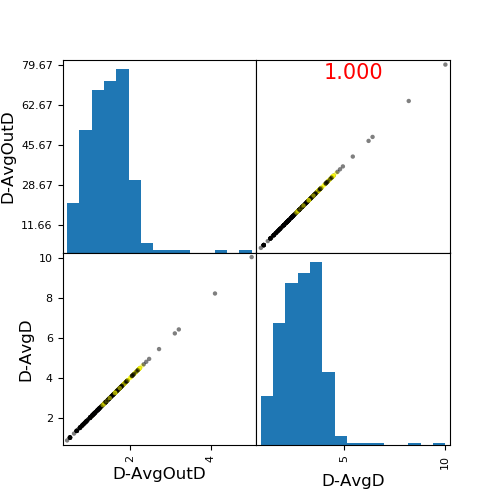

<IPython.core.display.Javascript object>


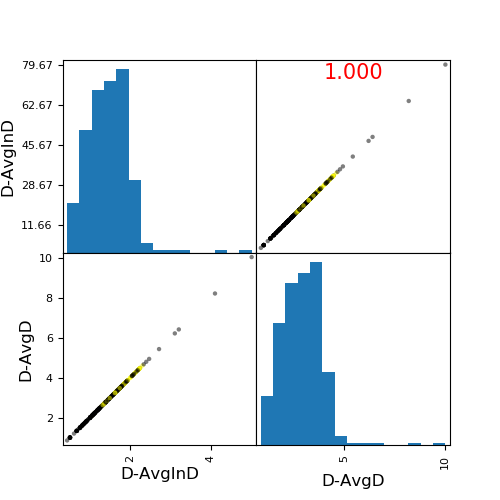

<IPython.core.display.Javascript object>


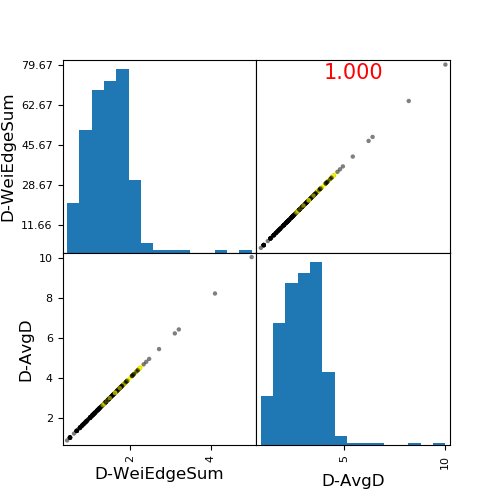

<IPython.core.display.Javascript object>


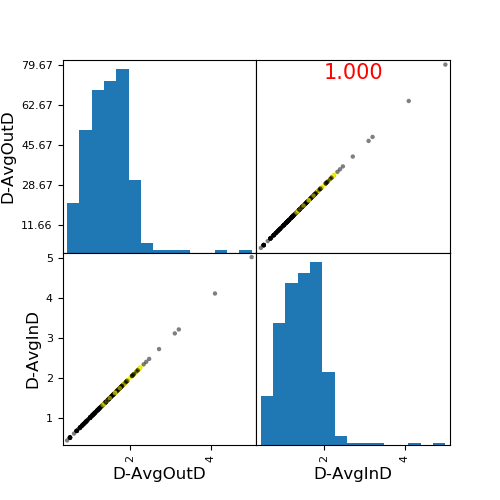

<IPython.core.display.Javascript object>


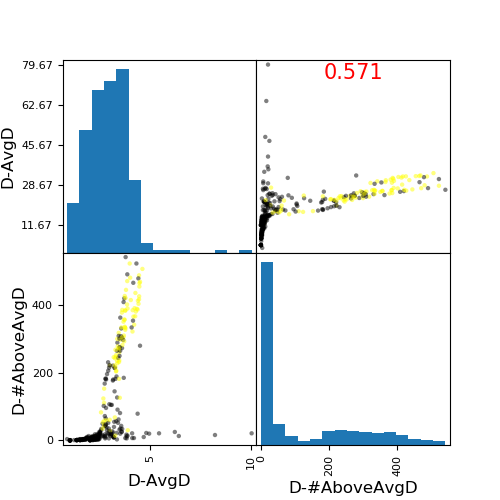

<IPython.core.display.Javascript object>


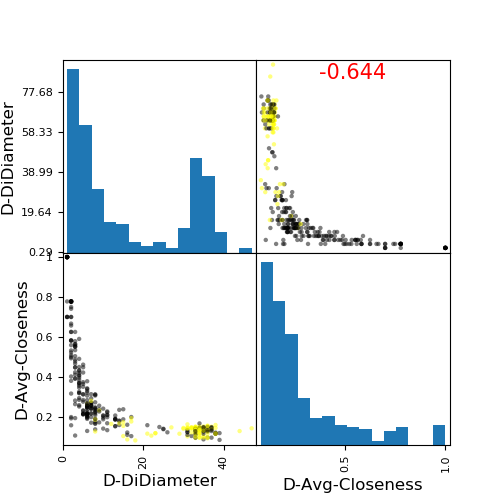

<IPython.core.display.Javascript object>


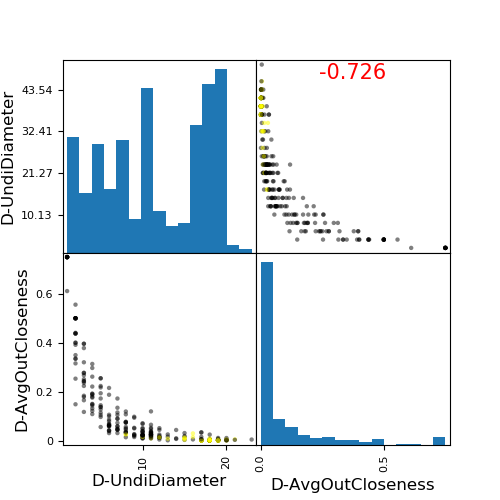

<IPython.core.display.Javascript object>


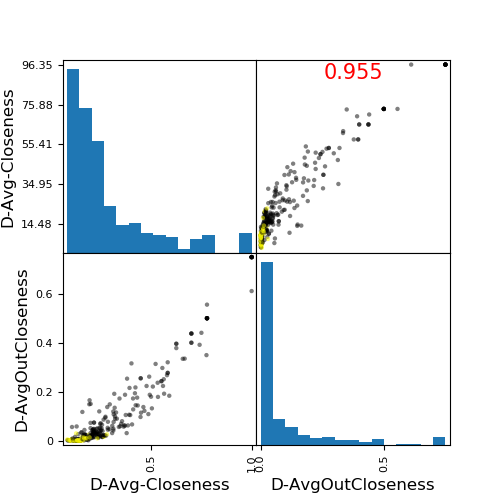

<IPython.core.display.Javascript object>


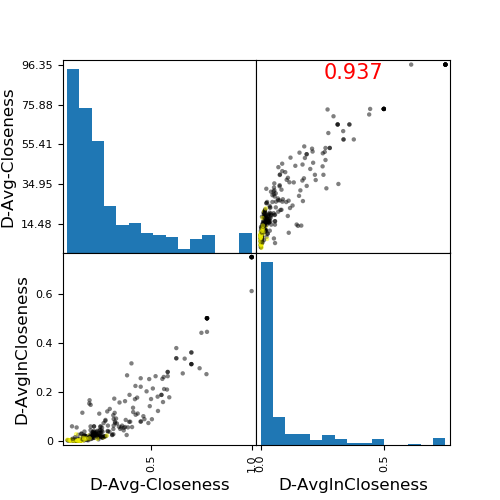

<IPython.core.display.Javascript object>


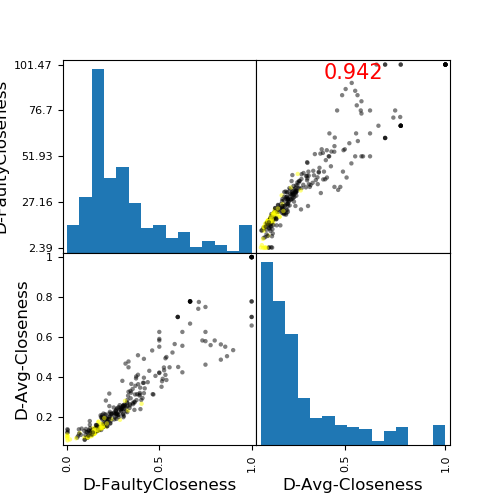

In [41]:
cor_scatter(data[['D-AvgOutD', 'D-AvgD']],y,5)
cor_scatter(data[['D-AvgInD', 'D-AvgD']],y,5)
cor_scatter(data[['D-WeiEdgeSum', 'D-AvgD']],y,5)
cor_scatter(data[['D-AvgOutD', 'D-AvgInD']],y,5)
cor_scatter(data[['D-AvgD', 'D-#AboveAvgD']],y,5)
cor_scatter(data[['D-DiDiameter', 'D-Avg-Closeness']],y,5)
cor_scatter(data[['D-UndiDiameter', 'D-AvgOutCloseness']],y,5)
cor_scatter(data[['D-Avg-Closeness', 'D-AvgOutCloseness']],y,5)
cor_scatter(data[['D-Avg-Closeness', 'D-AvgInCloseness']],y,5)
cor_scatter(data[['D-FaultyCloseness', 'D-Avg-Closeness']],y,5)

## Test metrics

<IPython.core.display.Javascript object>


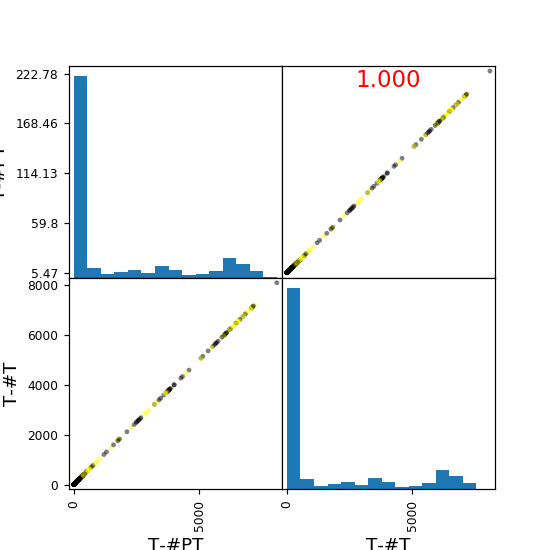

<IPython.core.display.Javascript object>


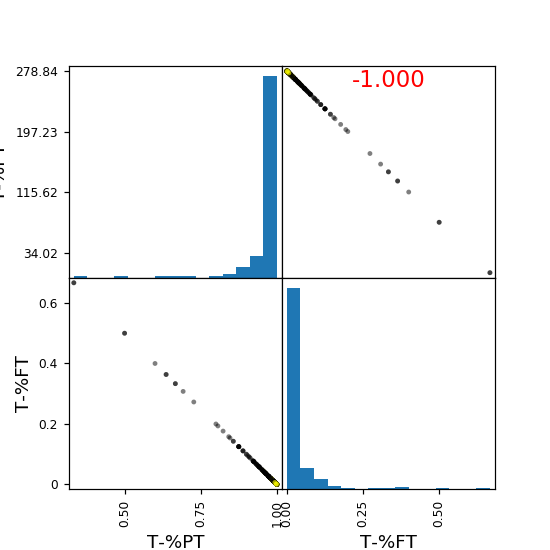

<IPython.core.display.Javascript object>


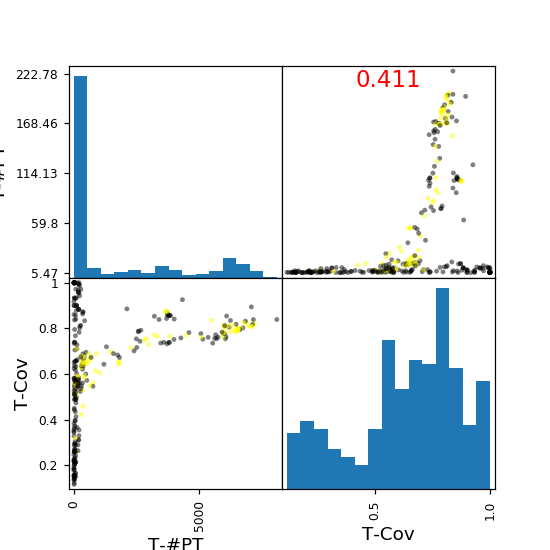

<IPython.core.display.Javascript object>


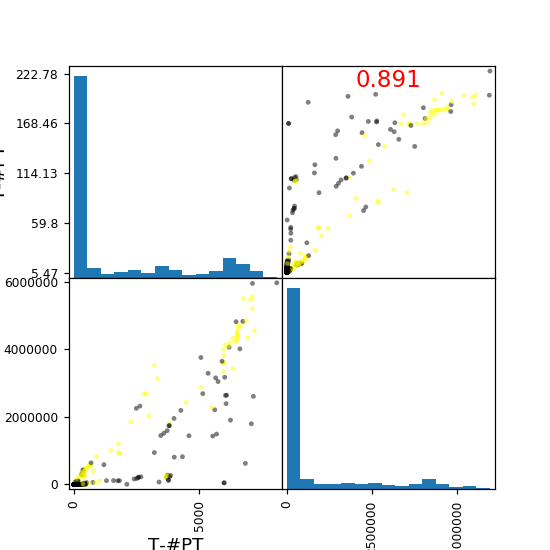

<IPython.core.display.Javascript object>


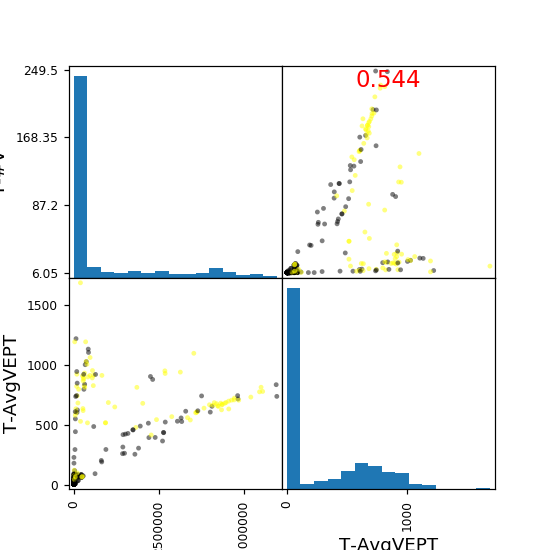

In [27]:
cor_scatter(data[['T-#PT', 'T-#T']],y,5)
cor_scatter(data[['T-%PT', 'T-%FT']],y,5)
cor_scatter(data[['T-#PT', 'T-Cov']],y,5)
cor_scatter(data[['T-#PT', 'T-#V']],y,5)
cor_scatter(data[['T-#V', 'T-AvgVEPT']],y,5)

## Bug metrics

<IPython.core.display.Javascript object>


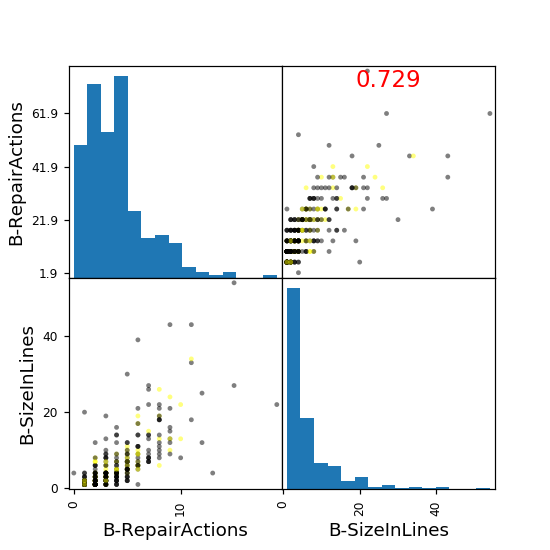

<IPython.core.display.Javascript object>


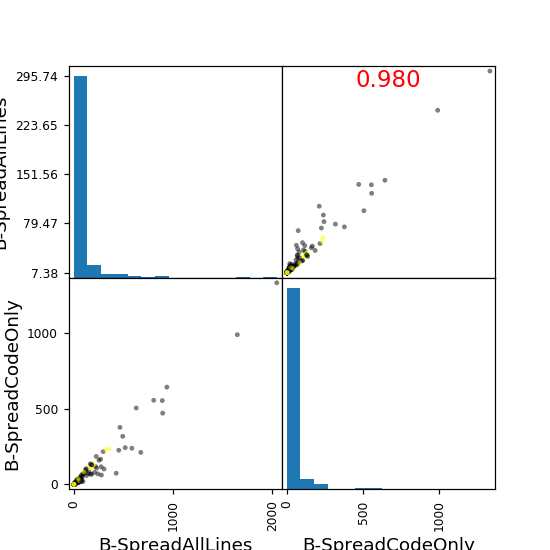

<IPython.core.display.Javascript object>


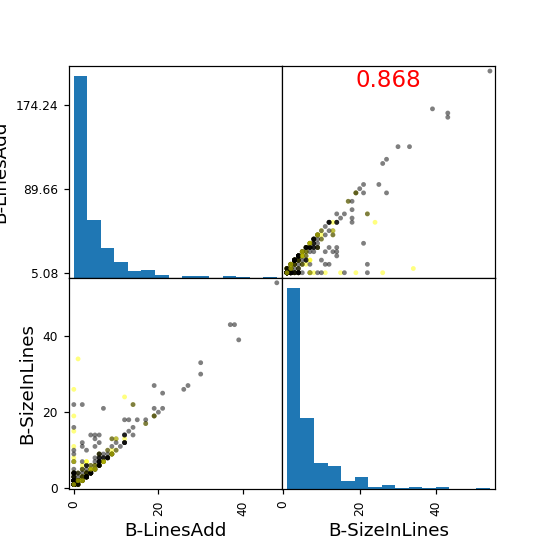

In [30]:
cor_scatter(data[['B-RepairActions', 'B-SizeInLines']],y,5)
cor_scatter(data[['B-SpreadAllLines', 'B-SpreadCodeOnly']],y,5)
cor_scatter(data[['B-LinesAdd', 'B-SizeInLines']],y,5)